# 1. Problem

Due to the growing need of educated and talented individuals, especially in developing countries, recruiting fresh graduates is a routine practice for organizations. Conventional recruiting methods and selection processes can be prone to errors and in order to optimize the whole process, some innovative methods are needed.

Can you monitor past data and use machine learning to predict whether the candidate gets placed ?



# 2. Data




1. 'gender' 
2. 'ssc_percentage' 
3. 'ssc_board' 
4. 'hsc_percentage' 
5. 'hsc_board'
6. 'hsc_subject' 
7. 'degree_percentage'
8. 'undergrad_degree'
9. 'work_experience'
10. 'emp_test_percentage'
11. 'specialisation'
12. 'mba_percent' 
13. 'status'



Original data source: https://www.kaggle.com/datasets/ahsan81/job-placement-dataset/data


# 3. Evaluation 

 the target for this project is 90 percent accuracy at predicting whether someone has job placement or not

# 4. Features

Data Dictionary

* gender : Gender of the candidate
* ssc_percentage : Senior secondary exams percentage (10th Grade)
* ssc_board : Board of education for ssc exams
* hsc_percentage : Higher secondary exams percentage (12th Grade)
* hsc_borad : Board of education for hsc exams
* hsc_subject : Subject of study for hsc
* degree_percentage : Percentage of marks in undergrad degree
* undergrad_degree : Undergrad degree majors
* work_experience : Past work experience
* emp_test_percentage : Aptitude test percentage
* specialization : Postgrad degree majors - (MBA specialization)
* mba_percent : Percentage of marks in MBA degree
* status (TARGET) : Status of placement. Placed / Not Placed


## Exploratory Data Analysis

In [260]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df = pd.read_csv('Job_Placement_Data.csv')
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [262]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [263]:
df.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [264]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [266]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [267]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [268]:
df.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

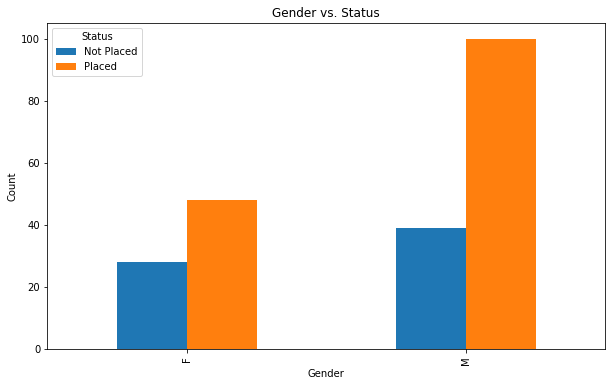

In [269]:
# gender and status

grouped = df.groupby(['gender', 'status']).size().unstack()

# Plot a bar chart to visualize the data
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Gender vs. Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

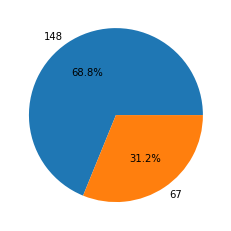

In [270]:
# Got placement vs not getting placement

status_counts = df['status'].value_counts()
status_counts
plt.pie(status_counts,labels=status_counts,autopct='%1.1f%%');

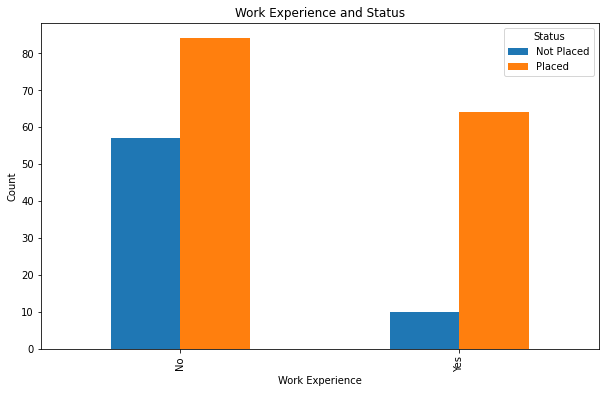

In [271]:
# work_experience and status
grouped = df.groupby(['work_experience', 'status']).size().unstack()

# Plot a bar chart to visualize the data
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Work Experience and Status')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

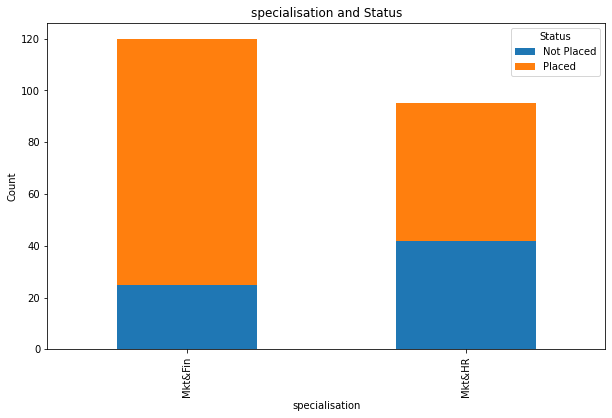

In [272]:
# specialisation and status
grouped = df.groupby(['specialisation', 'status']).size().unstack()

# Plot a bar chart to visualize the data
grouped.plot(kind='bar',stacked='True',figsize=(10, 6))
plt.title('specialisation and Status')
plt.xlabel('specialisation')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

<AxesSubplot:xlabel='undergrad_degree'>

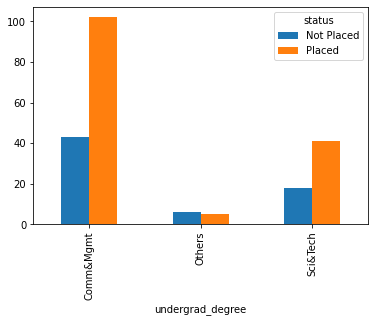

In [273]:
# undergrad_degree and status
grouped = df.groupby(['status','undergrad_degree']).size()
data = grouped.unstack(level=0)
data.plot(kind='bar')

## Correlation Analysis

In [274]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','specialisation','status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

gender                   int32
ssc_percentage         float64
ssc_board                int32
hsc_percentage         float64
hsc_board                int32
hsc_subject              int32
degree_percentage      float64
undergrad_degree         int32
work_experience          int32
emp_test_percentage    float64
specialisation           int32
mba_percent            float64
status                   int32
dtype: object

In [275]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [276]:
df.corr().round(2)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
gender,1.00,-0.07,0.02,-0.02,0.07,0.07,-0.17,0.06,0.09,0.08,-0.11,-0.30,0.09
ssc_percentage,-0.07,1.00,0.12,0.51,0.07,0.24,0.54,0.21,0.18,0.26,-0.17,0.39,0.61
ssc_board,0.02,0.12,1.00,-0.14,0.61,0.05,0.04,0.10,-0.04,-0.02,-0.05,0.08,0.04
hsc_percentage,-0.02,0.51,-0.14,1.00,-0.02,-0.16,0.43,-0.09,0.14,0.25,-0.24,0.35,0.49
hsc_board,0.07,0.07,0.61,-0.02,1.00,0.15,0.07,0.06,0.04,0.04,0.00,0.09,0.02
hsc_subject,0.07,0.24,0.05,-0.16,0.15,1.00,0.14,0.60,0.01,0.08,0.17,0.04,0.03
degree_percentage,-0.17,0.54,0.04,0.43,0.07,0.14,1.00,0.08,0.12,0.22,-0.22,0.40,0.48
undergrad_degree,0.06,0.21,0.10,-0.09,0.06,0.60,0.08,1.00,0.11,0.01,0.08,0.12,-0.02
work_experience,0.09,0.18,-0.04,0.14,0.04,0.01,0.12,0.11,1.00,0.06,-0.19,0.17,0.28
emp_test_percentage,0.08,0.26,-0.02,0.25,0.04,0.08,0.22,0.01,0.06,1.00,-0.24,0.22,0.13


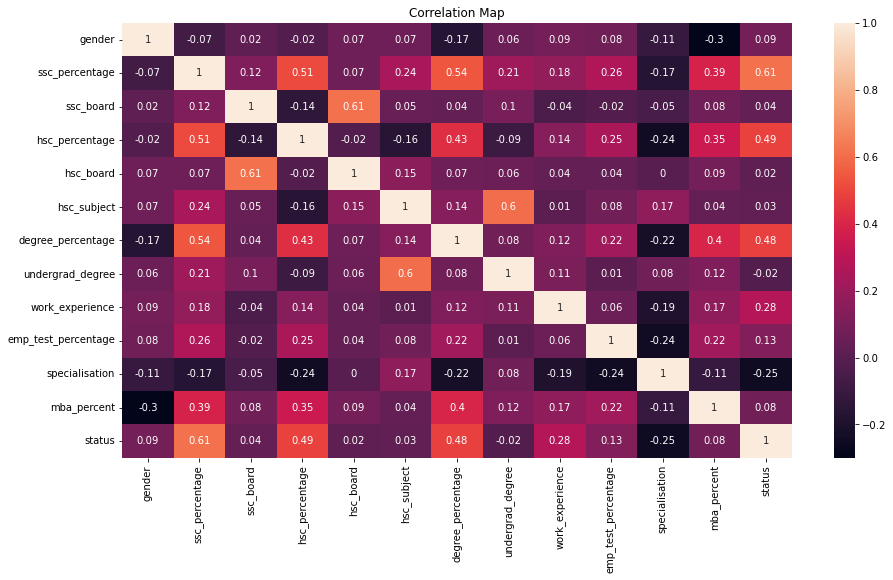

In [277]:
corr_matrix = df.corr().round(2)

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Map');


In [278]:
corr_matrix['status']

gender                 0.09
ssc_percentage         0.61
ssc_board              0.04
hsc_percentage         0.49
hsc_board              0.02
hsc_subject            0.03
degree_percentage      0.48
undergrad_degree      -0.02
work_experience        0.28
emp_test_percentage    0.13
specialisation        -0.25
mba_percent            0.08
status                 1.00
Name: status, dtype: float64

Conclusion: Based on the correlation analysis, we have identified that the features specialisation, emp_test_percentage, degree_percentage, ssc_percentage, hsc_percentage, and work_experience exhibit a correlation with the target variable status of equal to or greater than ±0.1. These features can be considered as potentially influential factors in predicting the target variable's status.

# 5. Modelling

* Comparing LinearSVC, kNeighbors Classifier and Ensemble classifier accuracy with default hyperparameter

In [279]:
#import related libraries

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

### LinearSVC

In [280]:
#to ensure the result reproducibility
np.random.seed(42)

#Split X and y
X = df[['ssc_percentage','hsc_percentage','degree_percentage','work_experience','specialisation','emp_test_percentage']]
y = df['status']


# split data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

#model instanstiate
model = LinearSVC()

#fit the model
model.fit(X_train,y_train)

#predict using model
y_preds = model.predict(X_test)

accuracy = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)

print(f'The model accuracy score is {accuracy*100:.2f}%')
print(f'The model f1 score is {f1*100:.2f}%')
print(f'The model precision socer is {precision*100:.2f}%')
print(f'The model recall score is {recall*100:.2f}%')

The model accuracy score is 69.77%
The model f1 score is 81.82%
The model precision socer is 69.23%
The model recall score is 100.00%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### KNN

In [281]:
#to ensure the result reproducibility
np.random.seed(42)

#model instanstiate
model = KNeighborsClassifier()

#fit the model
model.fit(X_train,y_train)

#predict using model
y_preds = model.predict(X_test)

accuracy = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)

print(f'The model accuracy score is {accuracy*100:.2f}%')
print(f'The model f1 score is {f1*100:.2f}%')
print(f'The model precision score is {precision*100:.2f}%')
print(f'The model recall score is {recall*100:.2f}%')

The model accuracy score is 76.74%
The model f1 score is 84.73%
The model precision score is 76.55%
The model recall score is 94.87%


### Ensemble Classifier

In [282]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#to ensure the result reproducibility
np.random.seed(42)


#model instanstiate
model = RandomForestClassifier()

#fit the model
model.fit(X_train,y_train)

#predict using model
y_preds = model.predict(X_test)

#Model evaluation
accuracy = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)

print(f'The model accuracy score is {accuracy*100:.2f}%')
print(f'The model f1 score is {f1*100:.2f}%')
print(f'The model precision score is {precision*100:.2f}%')
print(f'The model recall score is {recall*100:.2f}%')

The model accuracy score is 80.81%
The model f1 score is 86.64%
The model precision score is 82.31%
The model recall score is 91.45%


RandomForestClassifier has the highest accuracy score, f1_score, precision_score and recall_score


Can we get a better model within sklearn.ensemble?

In [283]:
#to ensure the result reproducibility
np.random.seed(42)


#model instanstiate
model = AdaBoostClassifier()

#fit the model
model.fit(X_train,y_train)

#predict using model
y_preds = model.predict(X_test)

#Model evaluation
accuracy = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)

print(f'The model accuracy score is {accuracy*100:.2f}%')
print(f'The model f1 score is {f1*100:.2f}%')
print(f'The model precision score is {precision*100:.2f}%')
print(f'The model recall score is {recall*100:.2f}%')

The model accuracy score is 71.51%
The model f1 score is 79.15%
The model precision score is 78.81%
The model recall score is 79.49%


In [284]:
from sklearn.ensemble import ExtraTreesClassifier

#to ensure the result reproducibility
np.random.seed(42)


#model instanstiate
default_model = ExtraTreesClassifier(n_jobs=1)

#fit the model
default_model.fit(X_train,y_train)

#predict using model
y_preds = default_model.predict(X_test)

#Model evaluation
default_model_accuracy = accuracy_score(y_test,y_preds)
f1 = f1_score(y_test,y_preds)
precision = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)

print(f'The model accuracy score is {default_model_accuracy*100:.2f}%')
print(f'The model f1 score is {f1*100:.2f}%')
print(f'The model precision score is {precision*100:.2f}%')
print(f'The model recall score is {recall*100:.2f}%')

The model accuracy score is 83.14%
The model f1 score is 88.80%
The model precision score is 80.99%
The model recall score is 98.29%


## ExtraTreesClassifier as high as possible for an accurate job prediction model

## Experimenting the ExtraTreeClassifier model by tuning the hyperparameter

In [285]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators':[10,100,200,500,1000,1200],
    'max_features':['sqrt','log2',None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3]
}

#to ensure the result reproducibility
np.random.seed(42)

#Split X and y
X = df[['ssc_percentage','hsc_percentage','degree_percentage','work_experience','specialisation','emp_test_percentage']]
y = df['status']


# split data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

#instantiate
model = ExtraTreesClassifier(n_jobs=1)

#setup randomizedSearchCV
rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=grid,
                             n_iter=162,
                             cv=5,
                             verbose=2)

#fit the RandomizedSearchCV
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total t

[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_features=sqrt, min_samples_

[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=2

[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=1200; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=

[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_features=log2, min_samples_lea

[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_features=log2, min_samples_leaf=2

[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_features=log2, min_samples_leaf=

[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_lea

[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=2

[CV] END max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_features=None, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=

[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_features=None, min_samples_lea

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(n_jobs=1), n_iter=162,
                   param_distributions={'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [286]:
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [287]:
#make prediciton

rs_model_predict = rs_model.predict(X_test)
rs_accuracy = round(accuracy_score(y_test,rs_model_predict)*100,2)
rs_accuracy

80.23

### GridSearchCV

In [288]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

grid_2 = {
    'n_estimators':[100,200,500],
    'max_depth':[None],
    'max_features':['auto','sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1,2]
}

#Split X and y
X = df[['ssc_percentage','hsc_percentage','degree_percentage','work_experience','specialisation','emp_test_percentage']]
y = df['status']


# split data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

#instantate
model = ExtraTreesClassifier(n_jobs=1)

#setup GridSearchCV
gs_model = GridSearchCV(estimator=model,
                       param_grid=grid_2,
                       cv=5,
                       verbose=5)

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.778 total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.889 total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.875 total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.889 total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200

[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500;, score=0.875 total time=   0.2s


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=5)

In [289]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [290]:
gs_model_predict = gs_model.predict(X_test)
gs_model_accuracy = round(accuracy_score(y_test,gs_model_predict),3)*100
gs_model_accuracy

82.6

In [291]:
default_model_accuracy,rs_accuracy,gs_model_accuracy

(0.8313953488372093, 80.23, 82.6)

In [292]:
default_model_accuracy = round(default_model_accuracy,2)*100
default_model_accuracy

83.0

In [293]:
default_model_accuracy,rs_accuracy,gs_model_accuracy

(83.0, 80.23, 82.6)

In [294]:
compare_accuracy =pd.DataFrame({
    'default_model': [default_model_accuracy],
    'rs_model_accuracy': [rs_accuracy],
    'gs_model_accuracy':[gs_model_accuracy]
})
compare_accuracy

,default_model,rs_model_accuracy,gs_model_accuracy
0,83.0,80.23,82.6


### Saving the best model (default_model)

In [296]:
from joblib import dump,load

#save model
dump(default_model,'job_prediction_model')

['job_prediction_model']

In [297]:
#load model to test
load_joblib = load(filename='job_prediction_model')

In [298]:
load_joblib.score(X_test,y_test)

0.8313953488372093